In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# COVID-19 - openDataSUS
Estudo sobre a incidência de COVID-19 em comparação com outras doenças respiratórias, de causa viral ou bacteriológica.
## HIPOTESE
Casos de Morte por COVID-19 foram SUPERNOTIFICADOS, tendo em vista que diversos governos estaduais emitiram diretrizes que indicavam a priorização dos óbitos como casos de COVID-19, antes de um exame detalhado da vítima.
## TEORIA
Mortes por outras doenças respiratórias foram suprimidas e notificadas como Causa Básica do Óbito por COVID-19.

## Sistema de Informação sobre Mortalidade – SIM (2009 a 2021)

No primeiro passo, vamos carregar os dados de cada óbito obtidos do SIM (Sistema de Informação sobre Mortalidade) entre os anos de 2009 a 2021.
As colunas mais importantes, para o nosso estudo, são:
- DTOBITO (Data do Óbito);
- SEXO;
- IDADE;
- CAUSABAS (Causa Base do Óbito)

In [13]:
# https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2009.csv
# ...
# https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2019.csv
# https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/sim_preliminar_2020.csv
# https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/DO21OPEN.csv

cols_list = ['DTOBITO', 'SEXO', 'IDADE', 'CAUSABAS']
df_tratado = pd.DataFrame(columns=cols_list)

for ano in range(2009, 2020):
    url = f'https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_{ano}.csv'
    print(f"Baixando dados de {url}")
    df_tratado = df_tratado.append(pd.read_csv(url, sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)

print(f"Baixando dados de https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/sim_preliminar_2020.csv")
df_tratado = df_tratado.append(pd.read_csv('https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/sim_preliminar_2020.csv', sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)
print(f"Baixando dados de https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/DO21OPEN.csv")
df_tratado = df_tratado.append(pd.read_csv('https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/SIM/DO21OPEN.csv', sep=';', usecols=cols_list, encoding='latin', error_bad_lines=False), ignore_index=True)

df_tratado.head()

Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2009.csv
Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2010.csv
Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2011.csv
Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2012.csv
Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2013.csv
Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2014.csv
Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2015.csv
Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2016.csv
Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2017.csv
Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2018.csv
Baixando dados de https://diaad.s3.sa-east-1.amazonaws.com/sim/Mortalidade_Geral_2019.csv
Baixando d

,DTOBITO,SEXO,IDADE,CAUSABAS
0,28102009,2,443,I228
1,6062009,2,201,R99
2,9022009,1,425,W747
3,4022009,1,467,C80
4,8032009,1,441,I219


Para obtermos o ano do óbito (que será usado adiante para catalogar os dados), criamos uma nova coluna "ANO" que conterá os dados de ano da coluna "DTOBITO", cujo formato é 'dMMyyyy'. Ou seja, o ano corresponde aos 4 últimos números do dado.

In [14]:
df_tratado['ANO'] = df_tratado['DTOBITO'].map(lambda x: int(re.findall(r'\d{4}$', str(x))[0]))

df_tratado.head()

,DTOBITO,SEXO,IDADE,CAUSABAS,ANO
0,28102009,2,443,I228,2009
1,6062009,2,201,R99,2009
2,9022009,1,425,W747,2009
3,4022009,1,467,C80,2009
4,8032009,1,441,I219,2009


## CASOS DE COVID-19

Segundo o documento anexo "Orientações para o preenchimento da Declaração de Óbito - COVID-19", o Governo do Estado de São Paulo (seguindo as orientações determinadas pelo Ministério da Saúde), orienta seus médicos a preencherem a Causa Básica do Óbito (campo CAUSABAS) com a sigla **B34.2**, sendo que, no conjunto de dados do SIM, estaria o óbito registrado como **B342**.

Com esses dados em mãos, isolamos os casos cuja causas do óbito foram:
- **B34.2** - Infecção por Coronavírus de localização não especificada
- **U04.9** - Síndrome Respiratória Aguda Grave - SARS
- **U07.1** - Código não habilitado no SIM

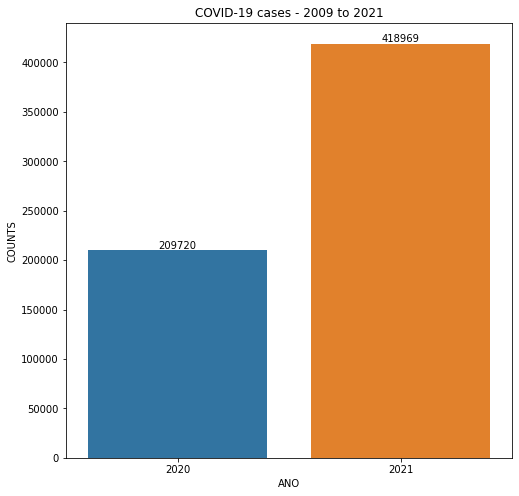

In [17]:
codes = ['B342', 'U049', 'U071']
df_covid = df_tratado[df_tratado['CAUSABAS'].isin(codes)]
covid_por_ano = df_covid.groupby(['ANO']).size().reset_index(name='COUNTS')

plt.figure(figsize=(8,8))
plt.title('COVID-19 cases - 2009 to 2021')
#plt.xticks(rotation=90)
ax = sns.barplot(x='ANO', y='COUNTS', data=covid_por_ano[covid_por_ano['ANO'].isin([2020, 2021])])
ax.bar_label(ax.containers[0])
plt.show()

## CASOS DE DENGUE

Agora, vamos comparar os resultados obtidos com o número de casos de **Dengue**.  

Códigos para Dengue:
- A90 - Dengue
- A91 - Febre hemorrágica devida ao vírus do dengue

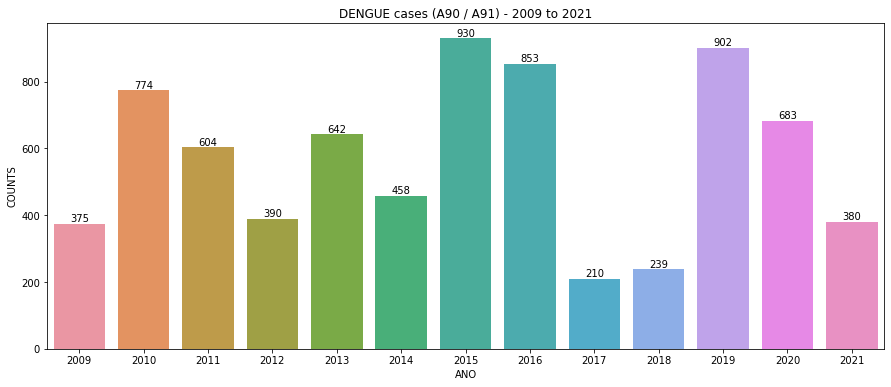

In [16]:
den_codes = ['A90', 'A91']
df_dengue = df_tratado[df_tratado['CAUSABAS'].isin(den_codes)]
dengue_por_ano = df_dengue.groupby(['ANO']).size().reset_index(name='COUNTS')

plt.figure(figsize=(15,6))
plt.title('DENGUE cases (A90 / A91) - 2009 to 2021')
#plt.xticks(rotation=90)
ax = sns.barplot(x='ANO', y='COUNTS', data=dengue_por_ano)
ax.bar_label(ax.containers[0])
#sns.lineplot(data=dengue_por_ano['COUNTS'])
plt.show()


## CASOS DE TUBERCULOSE

Agora, vamos comparar os resultados obtidos com o número de casos de **Tuberculose**.

Códigos para Tuberculose:
- A15 - Tuberculose respiratória, com confirmação bacteriológica e histológica
- A16 - Tuberculose das vias respiratórias, sem confirmação bacteriológica ou histológica
- A17 - Tuberculose do sistema nervoso
- A18 - Tuberculose de outros órgãos
- A19 - Tuberculose miliar
- B90 - Sequelas de tuberculose
- J65 - Pneumoconiose associada com tuberculose

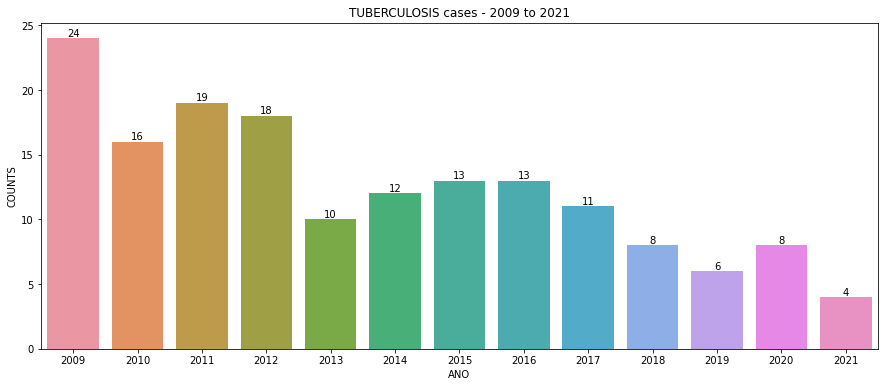

In [18]:
tub_codes = ['A15', 'A16', 'A17', 'A18', 'A19', 'B90', 'J65']
df_tuberculose = df_tratado[df_tratado['CAUSABAS'].isin(tub_codes)]
tuberculose_por_ano = df_tuberculose.groupby(['ANO']).size().reset_index(name='COUNTS')

plt.figure(figsize=(15,6))
plt.title('TUBERCULOSIS cases - 2009 to 2021')
ax = sns.barplot(x='ANO', y='COUNTS', data=tuberculose_por_ano)
ax.bar_label(ax.containers[0])
#sns.lineplot(data=tuberculose_por_ano['COUNTS'])
plt.show()

## CASOS DE PNEUMONIA

Agora, vamos comparar os resultados obtidos com o número de casos de **Pneumonia**.

Códigos para Pneumonia:
- J12 - Pneumonia viral não classificada em outra parte
- J13 - Pneumonia devida a Streptococcus pneumoniae
- J14 - Pneumonia devida a Haemophilus infuenzae
- J15 - Pneumonia bacteriana não classificada em outra parte
- J16 - Pneumonia devida a outros microorganismos infecciosos especificados não classificados em outra parte
- J17 - Pneumonia em doenças classificadas em outra parte
- J18 - Pneumonia por microorganismo não especificada
- P23 - Pneumonia congênita

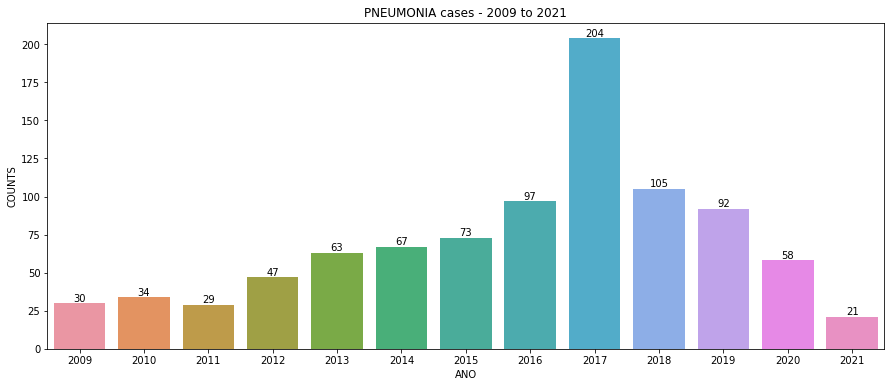

In [19]:
pne_codes = ['J12', 'J13', 'J14', 'J15', 'J16', 'J17', 'J18', 'P23']
df_pneumonia = df_tratado[df_tratado['CAUSABAS'].isin(pne_codes)]
pneumonia_por_ano = df_pneumonia.groupby(['ANO']).size().reset_index(name='COUNTS')

plt.figure(figsize=(15,6))
plt.title('PNEUMONIA cases - 2009 to 2021')
ax = sns.barplot(x='ANO', y='COUNTS', data=pneumonia_por_ano)
ax.bar_label(ax.containers[0])
#sns.lineplot(data=pneumonia_por_ano['COUNTS'])
plt.show()

**CONTINUA >>>**